Exploratory Analysis focus on comparing churn vs non-churn groups.
Train dataset has 970960 records but only 87300 which is approx 8.9%. Its better

# Load libraries

In [1]:
import pandas as pd
import numpy as np
import time
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def freqbars(colname, data, name):
    tm_plot = data.groupby(['is_churn', colname]).size().reset_index().pivot(columns='is_churn', index=colname, values=0)
    tm_plot.plot(kind='bar', stacked = False, color = ('navy', 'skyblue'))
    plt.ylabel('Count', fontsize=12)
    plt.xlabel(name, fontsize=12)
    plt.xticks(rotation='vertical')
    plt.title(f"Frequency of {name} Count", fontsize=12)

# Down sampling majority group

In [4]:
#Read train data
train = pd.read_csv('train_modified.csv')


In [5]:
train.describe()

,is_churn
count,138471.000000
mean,0.458370
std,0.498266
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Insights

## User Demographics:

#### Q1. Where are most of the members are from?

In [6]:
members = pd.read_csv('members_modified.csv')

In [7]:
train_member = pd.merge(left = train,right = members, how = 'left',on=['msno'])

In [8]:
train_member.city.value_counts()

1.0     56923
13.0    15146
5.0     11475
4.0      7830
15.0     6762
22.0     6689
6.0      4204
14.0     3087
12.0     1971
9.0      1459
11.0     1427
8.0      1281
18.0     1240
10.0     1093
21.0      948
17.0      838
3.0       789
7.0       373
16.0      147
20.0      113
19.0       20
Name: city, dtype: int64

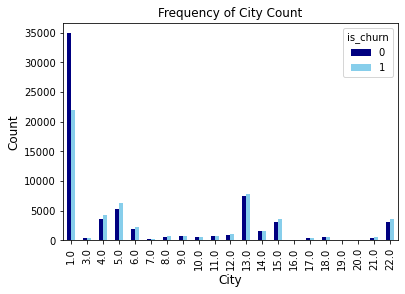

In [9]:
# City count
#sns.countplot(x="city", data=train_member, color = 'skyblue')
freqbars(colname = 'city', data = train_member, name = 'City')

Above chart shows churn and non-churn looks similar across cities. Major customers are from city 1

### How old are the most of the members?

Text(0.5, 1.0, 'Frequency of Age Count')

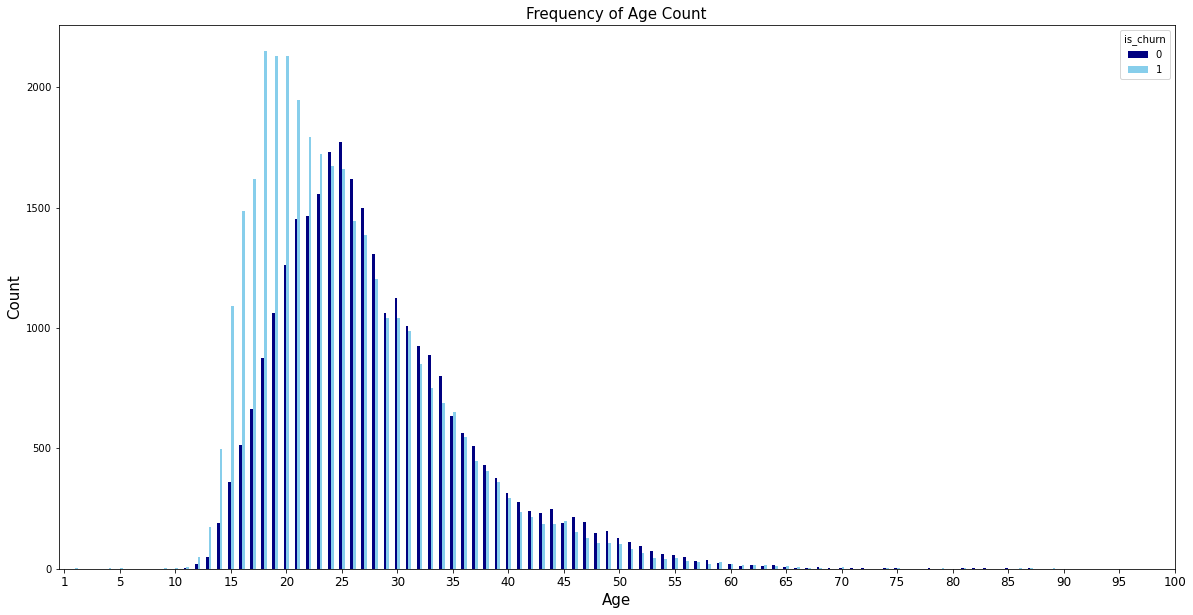

In [11]:
# Age count
tm_plot = train_member.groupby(['is_churn', 'bd']).size().reset_index().pivot(columns='is_churn', index='bd', values=0)
tm_plot.plot(kind='bar', stacked = False, color = ('navy', 'skyblue'), figsize=(20,10))
plt.ylabel('Count', fontsize=15)
plt.xlabel('Age', fontsize=15)
labellist = [1]
labellist.extend(list(range(5,101,5)))
plt.xticks(ticks = range(0, 101, 5), labels = labellist, rotation = 'horizontal', fontsize = 12)
plt.title("Frequency of Age Count", fontsize=15)

In [12]:
train_member.gender.value_counts()

male      33574
female    29632
Name: gender, dtype: int64

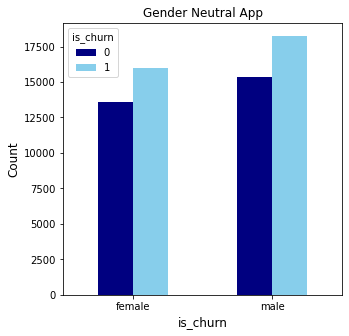

In [13]:
tm_plot = train_member.groupby(['is_churn', 'gender']).size().reset_index().pivot(columns='is_churn', index='gender', values=0)
tm_plot.plot(kind='bar', stacked = False, color = ('navy', 'skyblue'), figsize = (5,5))
plt.ylabel('Count', fontsize=12)
plt.xlabel('is_churn', fontsize=12)
plt.xticks(rotation='horizontal', fontsize = 10)
plt.title("Gender Neutral App", fontsize=12)
plt.show()

In [14]:
train_member.registered_via.value_counts()

7.0     52188
9.0     37891
3.0     20887
4.0     12364
13.0      485
Name: registered_via, dtype: int64

Text(0.5, 1.0, 'Frequency of Registration Method Count')

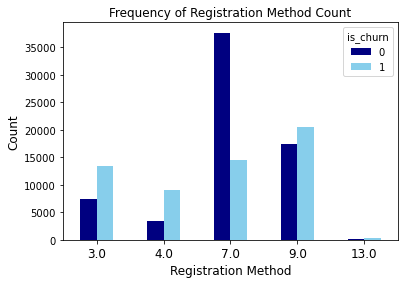

In [15]:
freqbars(colname = 'registered_via', data = train_member, name = 'Registration Method')
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.ylabel('Count', fontsize=12)
plt.title("Frequency of Registration Method Count", fontsize=12)

In [17]:
 transactions = pd.read_csv('transactions_modified.csv')

In [18]:
train_transac = pd.merge(left = train, right = transactions, how ='left', on = ['msno'])

In [19]:
train_transac.head()

,msno,is_churn,Unnamed: 0,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,377856,38,7,0,0,0,2016-10-31,2016-11-07,0
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,483921,38,30,149,149,0,2017-01-07,2017-02-06,0
2,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,4104,39,30,149,149,1,2016-10-31,2016-12-21,0
3,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,228390,39,30,149,149,1,2016-07-15,2016-08-21,0
4,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,263258,39,30,149,149,1,2016-08-31,2016-10-21,0


In [20]:
user_trans = train_transac.groupby(['msno','is_churn']).count()
user_trans = user_trans.iloc[:, :1]
user_trans.columns = ['transactions']
user_trans = user_trans.reset_index()

In [21]:
#Group transactions into chunks
def groupstrans(row):
    if row['transactions'] == 0:
        val = '0'
    elif row['transactions'] == 1:
        val = '1'
    elif row['transactions'] < 6:
        val = '2-5'
    elif row['transactions'] < 11:
        val = '6-10'
    elif row['transactions'] < 26:
        val = '11-25'
    elif row['transactions'] < 51:
        val = '26-50'
    elif row['transactions'] < 76:
        val = '51-75'
    elif row['transactions'] < 101:
        val = '76-100'
    else:
        val = '100 + '
    return val

user_trans['group'] = user_trans.apply(groupstrans, axis = 1)
user_trans.set_index('group', inplace = True)

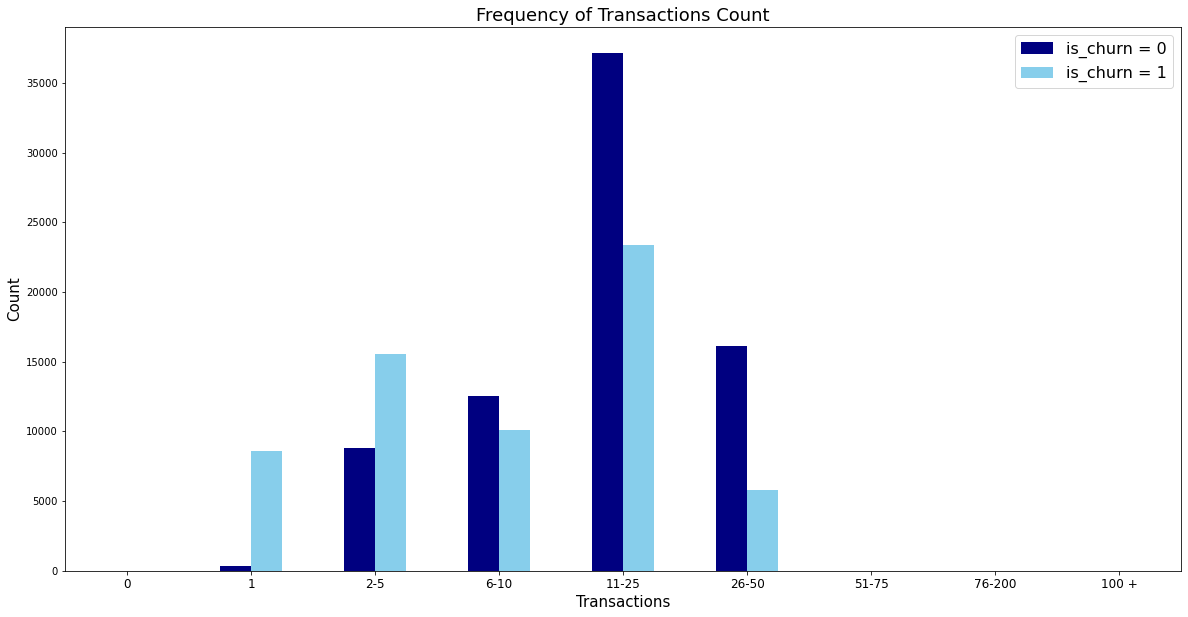

In [22]:

ut_plot = user_trans.groupby(['is_churn', 'group']).size().reset_index().pivot(columns='is_churn', index='group', values=0)
order = ['0', '1', '2-5', '6-10', '11-25', '26-50', '51-75', '76-200', '100 +']
ut_plot.reindex(order).plot(kind = 'bar', color = ('navy', 'skyblue'), figsize=(20,10))
plt.ylabel('Count', fontsize=15)
plt.xlabel('Transactions', fontsize=15)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.title("Frequency of Transactions Count", fontsize=18)
plt.legend(loc='upper right', fontsize = 16, labels = ['is_churn = 0', 'is_churn = 1'])

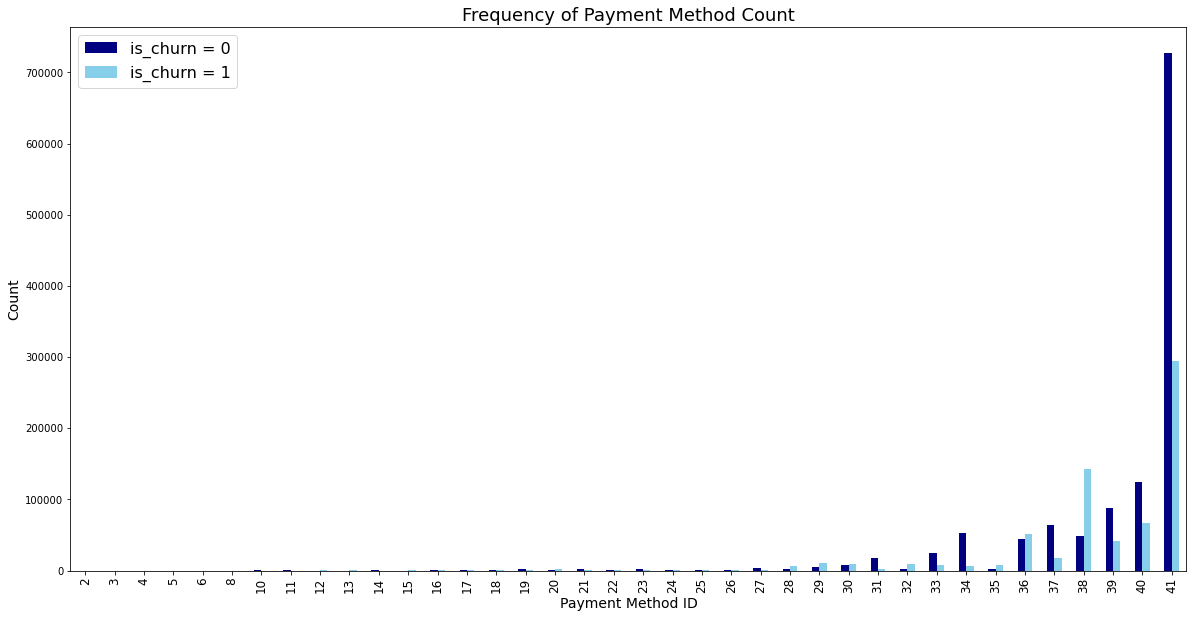

In [23]:
ud_plot = train_transac.groupby(['is_churn', 'payment_method_id']).size().reset_index().pivot(columns='is_churn', index='payment_method_id', values=0)
ud_plot.plot(kind='bar', stacked = False, color = ('navy', 'skyblue'), figsize=(20,10))
plt.ylabel('Count', fontsize=14)
plt.xlabel('Payment Method ID', fontsize=14)
plt.xticks(rotation = 'vertical', fontsize = 12)
plt.title("Frequency of Payment Method Count", fontsize=18)
plt.legend(loc='upper left', fontsize = 16, labels = ['is_churn = 0', 'is_churn = 1'])

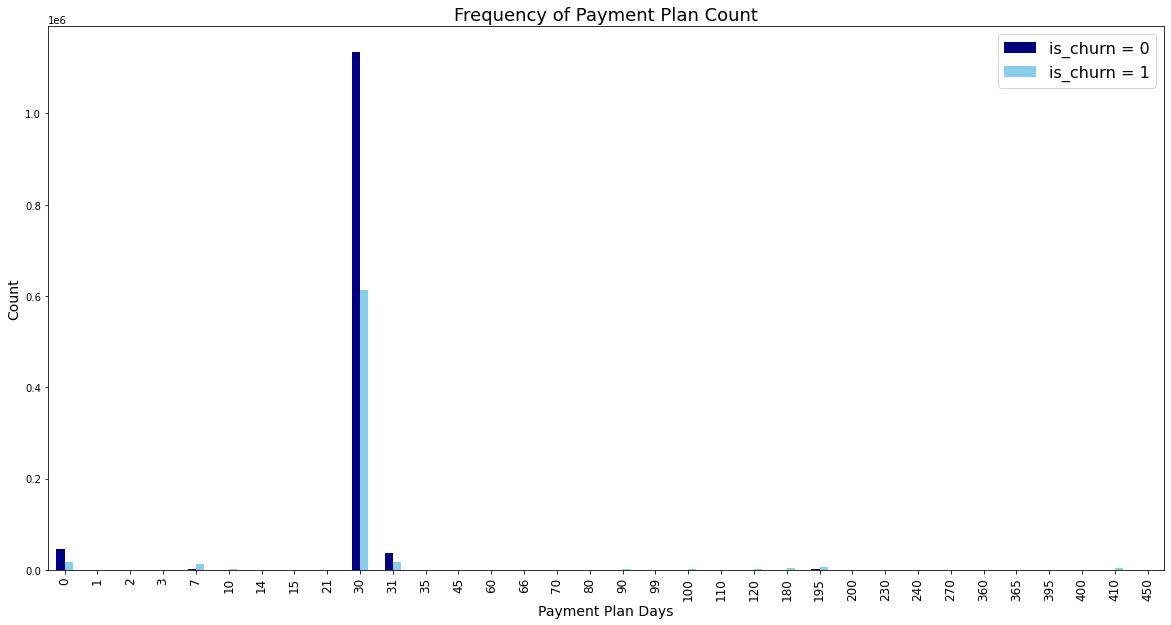

In [24]:
ud_plot = train_transac.groupby(['is_churn', 'payment_plan_days']).size().reset_index().pivot(columns='is_churn', index='payment_plan_days', values=0)
ud_plot.plot(kind='bar', stacked = False, color = ('navy', 'skyblue'), figsize=(20,10))
plt.ylabel('Count', fontsize=14)
plt.xlabel('Payment Plan Days', fontsize=14)
plt.xticks(rotation = 'vertical', fontsize = 12)
plt.title("Frequency of Payment Plan Count", fontsize=18)
plt.legend(loc='upper right', fontsize = 16, labels = ['is_churn = 0', 'is_churn = 1'])

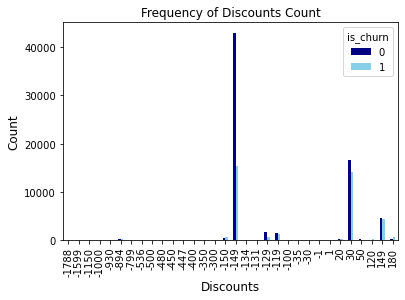

In [29]:
train_transac['difference'] = train_transac['plan_list_price'] - train_transac['actual_amount_paid']
freqbars(colname = 'difference', data = train_transac[train_transac.difference != 0], name = 'Discounts')

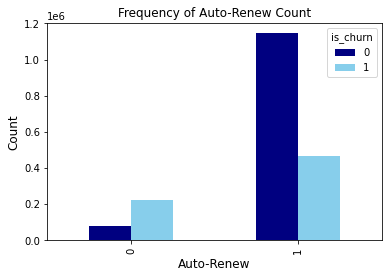

In [30]:
freqbars(colname = 'is_auto_renew', data = train_transac, name = 'Auto-Renew')

In [31]:
train_transac[train_transac.is_cancel == 1].is_churn.value_counts()

1    37107
0    19233
Name: is_churn, dtype: int64

In [32]:
# Keep only the most recent transaction date
most_recent = train_transac.sort_values(by='transaction_date', ascending=False)
most_recent.drop_duplicates(subset = ['msno'], keep=False, inplace = True)
most_recent = most_recent[['msno', 'is_churn','transaction_date']]

#Select columns needed from members data
acc_member = train_member[['msno', 'registration_init_time']]

#Merge the 2 datasets
account_len = pd.merge(left = most_recent, right = acc_member, how = 'inner', on = ['msno'])
account_len = account_len[(account_len.transaction_date.notnull() & account_len.registration_init_time.notnull())]

#Convert dates into datetime objects
account_len['registration_init_time'] = account_len.registration_init_time.apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d").date() if pd.notnull(x) else None)
account_len['transaction_date'] = account_len.transaction_date.apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d").date() if pd.notnull(x) else None)

#Calculate length of accounts
account_len['length'] = account_len['transaction_date'] - account_len['registration_init_time']

In [33]:
from datetime import timedelta
def groupsaccount(row):
    if row['length'] == 0:
        val = '0'
    elif row['length'] < timedelta(days=365):
        val = '< 1 year'
    elif row['length'] < timedelta(days=365*2):
        val = '1-2 years'
    elif row['length'] < timedelta(days=365*3):
        val = '2-3 years'
    elif row['length'] < timedelta(days=365*4):
        val = '3-4 years'
    elif row['length'] < timedelta(days=365*5):
        val = '4-5 years'
    elif row['length'] < timedelta(days=365*6):
        val = '5-6 years'
    else:
        val = '6+ years'
    return val

account_len['group'] = account_len.apply(groupsaccount, axis = 1)

Text(0.5, 1.0, 'Frequency of Account Length Count')

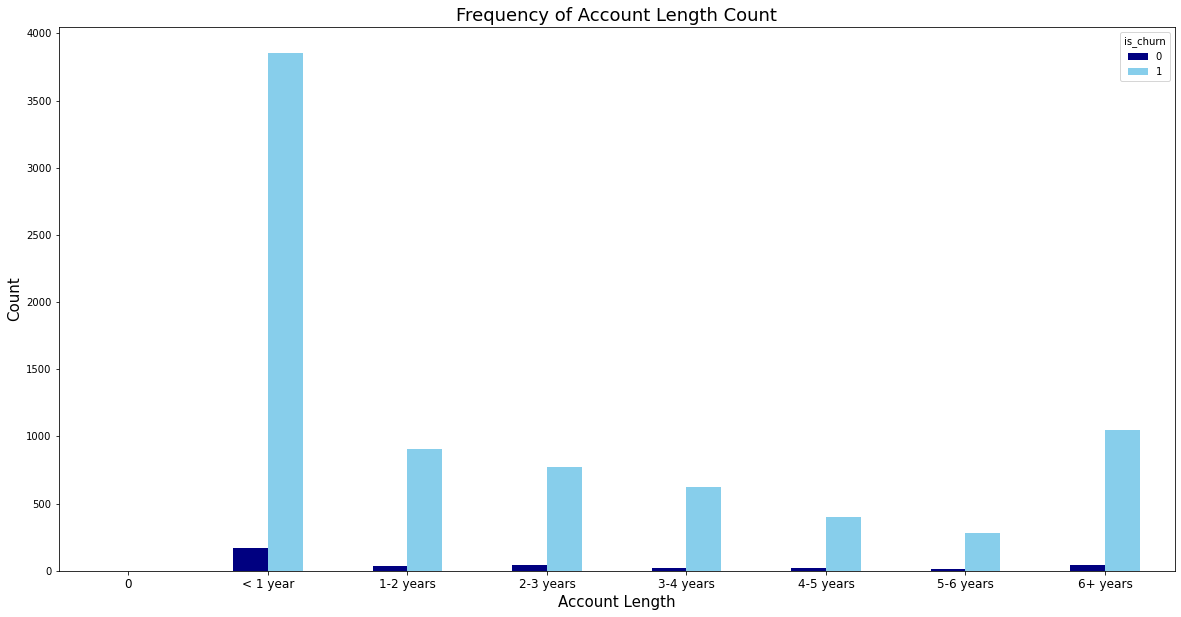

In [34]:
al_plot = account_len.groupby(['is_churn', 'group']).size().reset_index().pivot(columns='is_churn', index='group', values=0)
order = ['0', '< 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-6 years', '6+ years']
al_plot.reindex(order).plot(kind = 'bar', color = ('navy', 'skyblue'), figsize=(20,10))
plt.ylabel('Count', fontsize=15)
plt.xlabel('Account Length', fontsize=15)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.title("Frequency of Account Length Count", fontsize=18)

In [79]:
user_logs = pd.read_csv('user_logs_modified.csv')

In [80]:
user_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379990 entries, 0 to 1379989
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   msno        1379990 non-null  object 
 1   date        1379990 non-null  object 
 2   num_25      1379990 non-null  int64  
 3   num_50      1379990 non-null  int64  
 4   num_75      1379990 non-null  int64  
 5   num_985     1379990 non-null  int64  
 6   num_100     1379990 non-null  int64  
 7   num_unq     1379990 non-null  int64  
 8   total_secs  1379990 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 94.8+ MB


In [81]:
train_log = pd.merge(left = train, right = user_logs, how = 'left', on =['msno'])

In [82]:

len(set(list(train_log[train_log.date.isnull()].msno)))

58726

In [92]:
user_day = train_log.groupby(['msno','is_churn']).count()
user_day = user_day.iloc[:, :1]
user_day.columns = ['day_count']
user_day = user_day.reset_index()

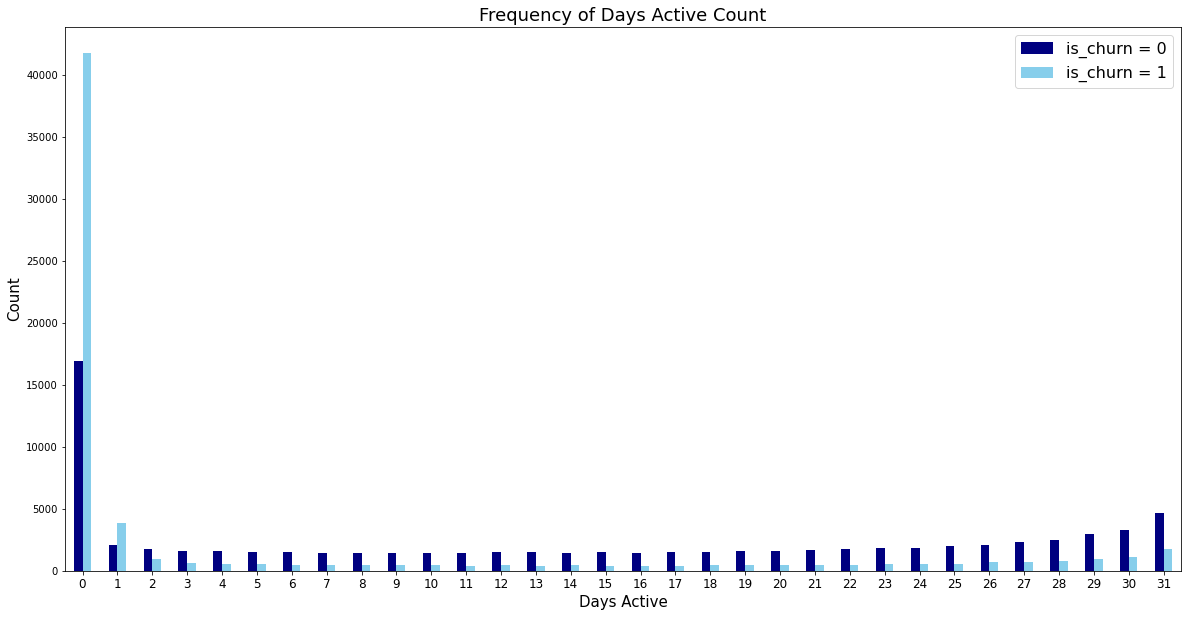

In [93]:
ud_plot = user_day.groupby(['is_churn', 'day_count']).size().reset_index().pivot(columns='is_churn', index='day_count', values=0)
ud_plot.plot(kind='bar', stacked = False, color = ('navy', 'skyblue'), figsize=(20,10))
plt.ylabel('Count', fontsize=15)
plt.xlabel('Days Active', fontsize=15)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.title("Frequency of Days Active Count", fontsize=18)
plt.legend(loc='upper right', fontsize = 16, labels = ['is_churn = 0', 'is_churn = 1'])

In [98]:
train_log['num_songs'] = train_log.num_25 + train_log.num_50 + train_log.num_75 + train_log.num_985 + train_log.num_100
user_songs = train_log.groupby(['msno','is_churn']).sum()['num_songs']
user_songs = user_songs.to_frame()
user_songs.columns = ['total_songs']
user_songs = user_songs.reset_index()

Text(0.5, 1.0, 'Relationship Between Total Songs Listened and Churn')

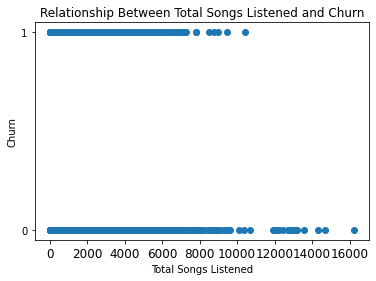

In [99]:
plt.scatter(x = user_songs.total_songs, y = user_songs.is_churn)
plt.ylabel('Churn', fontsize=10)
plt.yticks(ticks = [0,1])
plt.xlabel('Total Songs Listened', fontsize=10)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.title("Relationship Between Total Songs Listened and Churn", fontsize=12)

In [100]:
user_uniq = train_log.groupby(['msno','is_churn']).sum()['num_unq']
user_uniq = user_uniq.to_frame()
user_uniq.columns = ['total_songs']
user_uniq = user_uniq.reset_index()

Text(0.5, 1.0, 'Relationship Between Total Unique Songs and Churn')

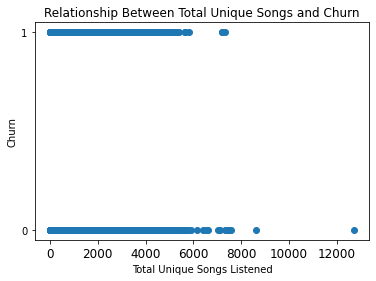

In [101]:
plt.scatter(x = user_uniq.total_songs, y = user_uniq.is_churn)
plt.ylabel('Churn', fontsize=10)
plt.yticks(ticks = [0,1])
plt.xlabel('Total Unique Songs Listened', fontsize=10)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.title("Relationship Between Total Unique Songs and Churn", fontsize=12)

In [102]:
# Keep only the most recent transaction date
most_recent = train_log[train_log.date.notnull()]
most_recent = train_log.sort_values(by='date', ascending=False)
most_recent.drop_duplicates(subset = ['msno'], keep=False, inplace = True)
most_recent = most_recent[['msno', 'is_churn','date']]

#Select columns needed from members data
acc_member = train_member[['msno', 'registration_init_time']]

#Merge the 2 datasets
account_len = pd.merge(left = most_recent, right = acc_member, how = 'inner', on = ['msno'])
account_len = account_len[(account_len.date.notnull() & account_len.registration_init_time.notnull())]

#Convert dates into datetime objects
account_len['registration_init_time'] = account_len.registration_init_time.apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d").date() if pd.notnull(x) else None)
account_len['date'] = account_len.date.apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d").date() if pd.notnull(x) else None)

#Calculate length of accounts
account_len['length'] = account_len['date'] - account_len['registration_init_time']

In [103]:
from datetime import timedelta
def groupsaccount(row):
    if row['length'] == 0:
        val = '0'
    elif row['length'] < timedelta(days=365):
        val = '< 1 year'
    elif row['length'] < timedelta(days=365*2):
        val = '1-2 years'
    elif row['length'] < timedelta(days=365*3):
        val = '2-3 years'
    elif row['length'] < timedelta(days=365*4):
        val = '3-4 years'
    elif row['length'] < timedelta(days=365*5):
        val = '4-5 years'
    elif row['length'] < timedelta(days=365*6):
        val = '5-6 years'
    else:
        val = '6+ years'
    return val

account_len['group'] = account_len.apply(groupsaccount, axis = 1)

Text(0.5, 1.0, 'Frequency of Account Length Count')

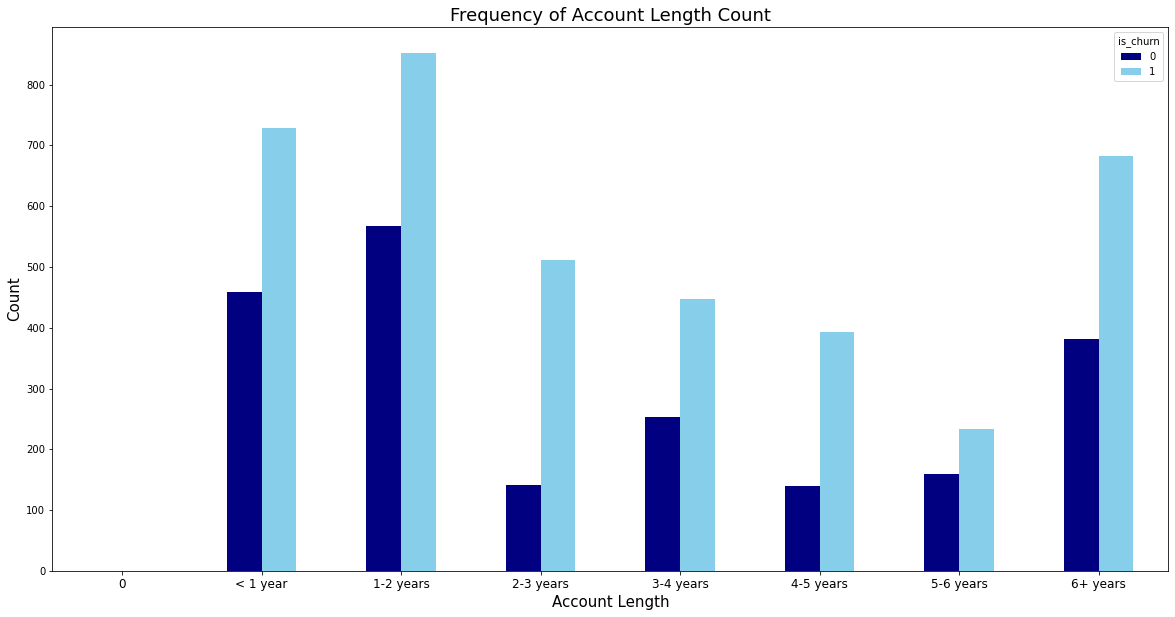

In [104]:
al_plot = account_len.groupby(['is_churn', 'group']).size().reset_index().pivot(columns='is_churn', index='group', values=0)
order = ['0', '< 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-6 years', '6+ years']
al_plot.reindex(order).plot(kind = 'bar', color = ('navy', 'skyblue'), figsize=(20,10))
plt.ylabel('Count', fontsize=15)
plt.xlabel('Account Length', fontsize=15)
plt.xticks(rotation = 'horizontal', fontsize = 12)
plt.title("Frequency of Account Length Count", fontsize=18)

In [105]:
account_len.is_churn.describe()

count    5950.000000
mean        0.646891
std         0.477976
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: is_churn, dtype: float64

Most users are from city 1
Male to Female ratio was 53:47
Most users pay via method 41
Most users registered via method 7
Most users opt for monthly payment plans
A lot of users did not use the app throughout the month of March
Most users only moderately use the app (168 hours of music for entire month)
The number of songs listened to was similar between the 2 groups
There were also a few key differences that will be useful in creating a model that would predict the churn rate. Below are key insights regarding the churn group:

In cities other than city 1, the proportion of those who churned is higher.
The peak of the age distribution for the churned group is in the early twenties while the peak for those who did not churn has a peak in the late twenties.
Registration methods other than 7 had a higher number of users who have churned.
Those who have churned are more likely to have made more than 1 transaction
Those who have churned are also more likely to have chosen a payment plan that was less frequent than monthly.
Most people did not receive any discounts; however, those who churned are more likely to have overpaid for their subscription.
Those that who had accounts that did not auto-renew were more likely to churn
Those who churned had accounts that were active longer.